In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('spam_tfidf.csv', index_col=[0])
data.shape  # il dataset ha 4600 righe e 58 colonne
data.head()  # vediamo le prime 5 righe del dataset

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,targhet
0,0.000000,1.04567,0.570084,0.0,0.309696,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.553776,0.000000,0.00000,1
1,0.309672,0.45748,0.445378,0.0,0.135492,0.427637,0.365548,0.120390,0.000000,1.186630,...,0.000000,0.0,0.0,0.00000,0.069628,0.0,0.264787,0.214164,0.08707,1
2,0.088478,0.00000,0.632436,0.0,1.190396,0.290182,0.330734,0.206383,1.141600,0.315593,...,0.131159,0.0,0.0,0.01762,0.075430,0.0,0.196455,0.218923,0.01814,1
3,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.072265,0.0,0.097516,0.000000,0.00000,1
4,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.071210,0.0,0.096092,0.000000,0.00000,1


In [4]:
# data processing
X = data.drop('targhet', axis=1)
y = data['targhet']  # colonna che segna se è o meno spam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Training time with C = 1.0: 2.395354
Prediction time: 0.221697
Miss-classified examples: 171
Accuracy: 0.814
Training time with C = 10.0: 0.908571
Prediction time: 0.107056
Miss-classified examples: 107
Accuracy: 0.884
Training time with C = 100.0: 0.430606
Prediction time: 0.071288
Miss-classified examples: 77
Accuracy: 0.916
Training time with C = 1000.0: 1.035963
Prediction time: 0.052338
Miss-classified examples: 70
Accuracy: 0.924
Training time with C = 10000.0: 0.756522
Prediction time: 0.045883
Miss-classified examples: 70
Accuracy: 0.924
Training time with C = 100000.0: 1.989566
Prediction time: 0.079721
Miss-classified examples: 80
Accuracy: 0.913
Training time with C = 1000000.0: 112.909499
Prediction time: 0.054607
Miss-classified examples: 88
Accuracy: 0.904
Training time with C = 10000000.0: 348.464428
Prediction time: 0.090444
Miss-classified examples: 85
Accuracy: 0.908


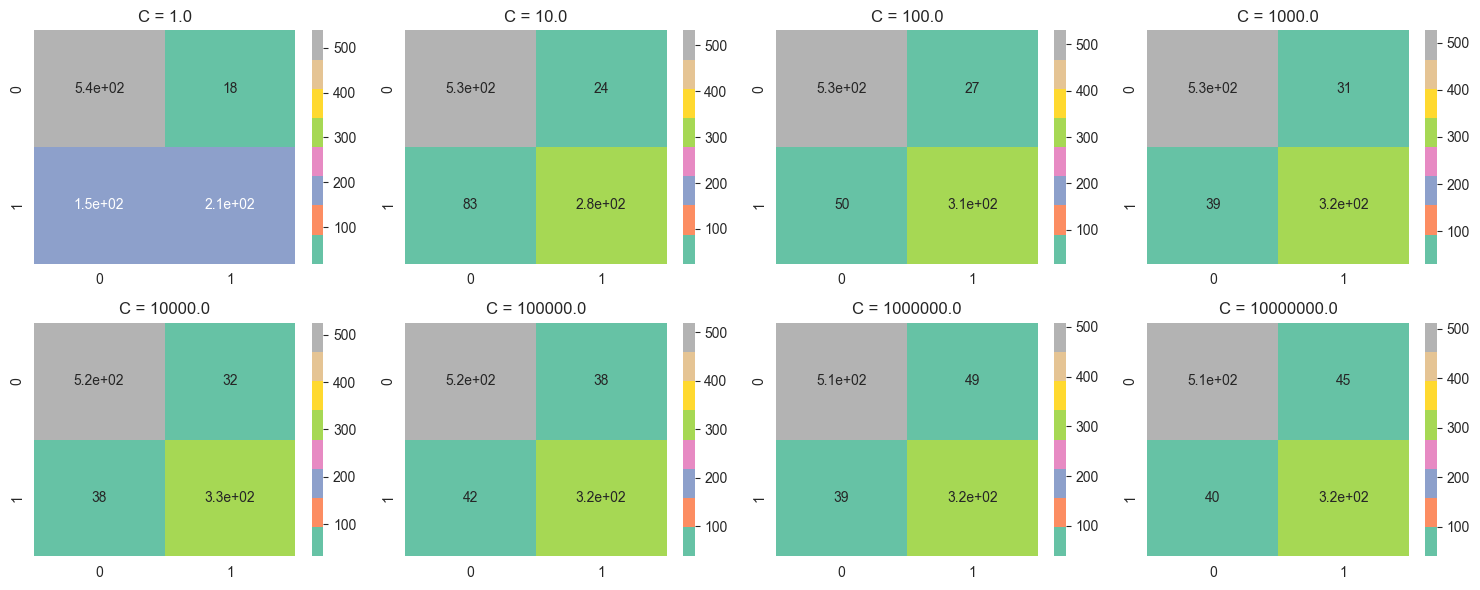

In [7]:
# qui faccio il learning

c: list = [1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0]
fis, axs = plt.subplots(2, 4, figsize=(15, 6))

for i in range(8):
    svcclassifier = SVC(kernel='poly', degree=2, C=c[i])
    start_time = time.time()
    svcclassifier.fit(X_train, y_train)
    print(f'Training time with C = {c[i]}: %f' % (time.time() - start_time))
    start_time = time.time()
    y_predict = svcclassifier.predict(X_test)
    print('Prediction time: %f' % (time.time() - start_time))
    print('Miss-classified examples: %d' % (y_test != y_predict).sum())
    print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))
    #score = cross_val_score(svcclassifier, X, y, cv=10)
    cm = confusion_matrix(y_test, y_predict)
    sn.heatmap(cm, annot=True, ax=axs[int(i / 4), i % 4], cmap=sn.color_palette("Set2"))
    axs[int(i / 4), i % 4].set_title('C = ' + str(c[i])+)   # '\n accuracy media: %.5f' %np.mean(score)
plt.tight_layout()
plt.show()

In [8]:
fis.savefig('confusion matrix per svm polinomiale.png', bbox_inches='tight')